In [3]:
path1 = "Spectronaut_5007.tsv"; path2 = "Spectronaut_4994.tsv"

In [4]:
print(path1,path2)
###you just need to run this cell once to get the necessary lib
##%pip install numpy matplotlib pandas duckdb upsetplot

Spectronaut_5007.tsv Spectronaut_4994.tsv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd

import duckdb

#get re
import re

#venn diagram
import upsetplot

In [11]:
##temperary cell:
#file = pd.read_csv('spectronaut_20231218_Odyssey_Report.tsv', sep="\t")
#file.columns = [c.replace(".","_") for c in file.columns]
#tsvfile1=file[file['R_FileName'].str.contains('5007', regex=False)]
#tsvfile2=file[file['R_FileName'].str.contains('4994', regex=False)]
#tsvfile1.to_csv('Spectronaut_5007.tsv', sep="\t")
#tsvfile2.to_csv('Spectronaut_4994.tsv', sep="\t")

pd.set_option("display.max_columns", None)
tsvfile1 = pd.read_csv(path1, index_col=0, sep="\t")
tsvfile2 = pd.read_csv(path2, index_col=0, sep="\t")
tsvfile2

,R_Condition,R_FileName,PG_ProteinLabel,R_Replicate,PG_Genes,PG_ProteinAccessions,PG_ProteinNames,PG_MS2Quantity,PG_Quantity,PEP_StrippedSequence,EG_IntPIMID,EG_ModifiedPeptide,EG_IonMobility,EG_Qvalue,EG_ApexRT,EG_MeanTailingFactor,FG_ShapeQualityScore (MS1),FG_ShapeQualityScore (MS2),EG_PeakWidth,FG_IonMobilityPeakWidth,EG_TotalQuantity (Settings),FG_Charge,FG_Id,FG_IntMID,FG_PrecMz,FG_MS1Quantity,FG_TheoreticalMz
43960,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,TMA7B_HUMAN;TMA7_HUMAN,2,TMA7B;TMA7,A0A024R1R8;Q9Y2S6,TMA7B_HUMAN;TMA7_HUMAN,134.790588,134.790588,GPLATGGIK,_GPLATGGIK_,_GPLATGGIK_,0.768130,9.084233e-08,11.294406,1.069573,0.586256,0.634845,0.058647,0.019158,134.790588,2,_GPLATGGIK_.2,_GPLATGGIK_,407.245087,202.571228,407.245087
43961,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,NUD4B_HUMAN,2,NUDT4B,A0A024RBG1,NUD4B_HUMAN,50.086582,50.086582,LLGIFEQNQDR,_LLGIFEQNQDR_,_LLGIFEQNQDR_,0.957646,7.170206e-09,20.264458,2.833624,0.488832,0.477204,0.077709,0.027218,50.086582,2,_LLGIFEQNQDR_.2,_LLGIFEQNQDR_,666.848938,157.741257,666.848938
43962,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,GAL3B_HUMAN;GAL3A_HUMAN,2,GATD3B;GATD3,A0A0B4J2D5;P0DPI2,GAL3B_HUMAN;GAL3A_HUMAN,118.653381,118.653381,NVLTESAR,_NVLTESAR_,_NVLTESAR_,0.802000,9.150208e-06,10.127147,1.330153,0.756359,0.588622,0.058268,0.014672,297.722870,2,_NVLTESAR_.2,_NVLTESAR_,445.240509,414.874207,445.240509
43963,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,GAL3B_HUMAN;GAL3A_HUMAN,2,GATD3B;GATD3,A0A0B4J2D5;P0DPI2,GAL3B_HUMAN;GAL3A_HUMAN,118.653381,118.653381,EVVEAHVDQK,_EVVEAHVDQK_,_EVVEAHVDQK_,0.906196,1.104680e-08,8.611849,0.473658,0.955692,0.775266,0.049539,0.017726,123.268898,2,_EVVEAHVDQK_.2,_EVVEAHVDQK_,577.296021,636.576355,577.296021
43964,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,GAL3B_HUMAN;GAL3A_HUMAN,2,GATD3B;GATD3,A0A0B4J2D5;P0DPI2,GAL3B_HUMAN;GAL3A_HUMAN,118.653381,118.653381,NLSTFAVDGK,_NLSTFAVDGK_,_NLSTFAVDGK_,0.848000,2.673284e-07,15.108800,1.633988,0.813056,0.703887,0.071149,0.019520,141.445740,2,_NLSTFAVDGK_.2,_NLSTFAVDGK_,526.274536,500.771271,526.274536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85287,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,S23IP_HUMAN,2,SEC23IP,Q9Y6Y8,S23IP_HUMAN,36.292900,36.292900,IDENYSLPTCK,_IDENYSLPTC[+57]K_,_IDENYSLPTC[Carbamidomethyl (C)]K_,0.947470,1.213994e-04,14.722684,0.083409,0.340890,0.434266,0.051269,0.015757,23.252398,2,_IDENYSLPTC[Carbamidomethyl (C)]K_.2,_IDENYSLPTC[+57]K_,670.313538,117.176125,670.313538
85288,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,S23IP_HUMAN,2,SEC23IP,Q9Y6Y8,S23IP_HUMAN,36.292900,36.292900,IDMESLLMCTVDDLK,_IDMESLLMC[+57]TVDDLK_,_IDMESLLMC[Carbamidomethyl (C)]TVDDLK_,1.123182,1.529347e-09,27.051676,0.909243,0.700487,0.382075,0.051548,0.018383,21.059813,2,_IDMESLLMC[Carbamidomethyl (C)]TVDDLK_.2,_IDMESLLMC[+57]TVDDLK_,891.919739,231.286392,891.919739
85289,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,S23IP_HUMAN,2,SEC23IP,Q9Y6Y8,S23IP_HUMAN,36.292900,36.292900,YDVYLYDR,_YDVYLYDR_,_YDVYLYDR_,0.900410,2.372805e-04,16.705723,-1.212368,0.725377,0.286265,0.067575,0.012312,30.210133,2,_YDVYLYDR_.2,_YDVYLYDR_,553.761292,59.823788,553.761292
85290,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,S23IP_HUMAN,2,SEC23IP,Q9Y6Y8,S23IP_HUMAN,36.292900,36.292900,LTLDESYDLVVENK,_LTLDESYDLVVENK_,_LTLDESYDLVVENK_,1.078716,8.095894e-05,21.658979,-0.202156,0.754113,0.300957,0.060675,0.020142,21.135605,2,_LTLDESYDLVVENK_.2,_LTLDESYDLVVENK_,819.417053,369.972473,819.417053


In [5]:
#write the multiple entrances in multiple rows
def yaniterator(X):
    for index, *_tuple in X.itertuples(name=None):
        for untupled_tuple in zip(*(_str.split(";") for _str in _tuple)):
            yield (index,) + untupled_tuple

def get_table(tsvdata):
    selected_col = ["PG_ProteinLabel", "PG_Genes", "PG_ProteinAccessions", "PG_ProteinNames"]
    X = tsvdata[selected_col]
    Y = pd.DataFrame(yaniterator(X), columns=["X_index"] + list(X.columns)).set_index("X_index")
    return pd.concat([Y,tsvdata.drop(columns=selected_col).loc[Y.index]],axis=1)

# possibly infinite sequence of results
# def natural_numbers():
#     i = 0
#     while True:
#         yield i
#         i += 1

# it = natural_numbers()
# print(next(it))
# print(next(it))
# print(next(it))
# print(next(it))

# jt = iter(range(10))
# next(jt)
# next(jt)
# list(zip(range(10), range(1,11), range(2,12)))

#tsvfile2
#X = tsvfile2[selected_col]
#Y = pd.DataFrame(yaniterator(X), columns=["X_index"] + list(X.columns)).set_index("X_index")
#data2 = pd.concat(
#    [
#        #Y.add_prefix("Y___"),
#        Y,
#        tsvfile2.drop(columns=selected_col).loc[Y.index]
#    ],
#    axis=1
#)

data1 = get_table(tsvfile1).reset_index().drop(columns=["X_index"])
data2 = get_table(tsvfile2).reset_index().drop(columns=["X_index"])
data2

,PG_ProteinLabel,PG_Genes,PG_ProteinAccessions,PG_ProteinNames,R_Condition,R_FileName,R_Replicate,PG_MS2Quantity,PG_Quantity,PEP_StrippedSequence,EG_IntPIMID,EG_ModifiedPeptide,EG_IonMobility,EG_Qvalue,EG_ApexRT,EG_MeanTailingFactor,FG_ShapeQualityScore (MS1),FG_ShapeQualityScore (MS2),EG_PeakWidth,FG_IonMobilityPeakWidth,EG_TotalQuantity (Settings),FG_Charge,FG_Id,FG_IntMID,FG_PrecMz,FG_MS1Quantity,FG_TheoreticalMz
0,TMA7B_HUMAN,TMA7B,A0A024R1R8,TMA7B_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,134.790588,134.790588,GPLATGGIK,_GPLATGGIK_,_GPLATGGIK_,0.768130,9.084233e-08,11.294406,1.069573,0.586256,0.634845,0.058647,0.019158,134.790588,2,_GPLATGGIK_.2,_GPLATGGIK_,407.245087,202.571228,407.245087
1,TMA7_HUMAN,TMA7,Q9Y2S6,TMA7_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,134.790588,134.790588,GPLATGGIK,_GPLATGGIK_,_GPLATGGIK_,0.768130,9.084233e-08,11.294406,1.069573,0.586256,0.634845,0.058647,0.019158,134.790588,2,_GPLATGGIK_.2,_GPLATGGIK_,407.245087,202.571228,407.245087
2,NUD4B_HUMAN,NUDT4B,A0A024RBG1,NUD4B_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,50.086582,50.086582,LLGIFEQNQDR,_LLGIFEQNQDR_,_LLGIFEQNQDR_,0.957646,7.170206e-09,20.264458,2.833624,0.488832,0.477204,0.077709,0.027218,50.086582,2,_LLGIFEQNQDR_.2,_LLGIFEQNQDR_,666.848938,157.741257,666.848938
3,GAL3B_HUMAN,GATD3B,A0A0B4J2D5,GAL3B_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,118.653381,118.653381,NVLTESAR,_NVLTESAR_,_NVLTESAR_,0.802000,9.150208e-06,10.127147,1.330153,0.756359,0.588622,0.058268,0.014672,297.722870,2,_NVLTESAR_.2,_NVLTESAR_,445.240509,414.874207,445.240509
4,GAL3A_HUMAN,GATD3,P0DPI2,GAL3A_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,118.653381,118.653381,NVLTESAR,_NVLTESAR_,_NVLTESAR_,0.802000,9.150208e-06,10.127147,1.330153,0.756359,0.588622,0.058268,0.014672,297.722870,2,_NVLTESAR_.2,_NVLTESAR_,445.240509,414.874207,445.240509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41685,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,36.292900,36.292900,IDENYSLPTCK,_IDENYSLPTC[+57]K_,_IDENYSLPTC[Carbamidomethyl (C)]K_,0.947470,1.213994e-04,14.722684,0.083409,0.340890,0.434266,0.051269,0.015757,23.252398,2,_IDENYSLPTC[Carbamidomethyl (C)]K_.2,_IDENYSLPTC[+57]K_,670.313538,117.176125,670.313538
41686,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,36.292900,36.292900,IDMESLLMCTVDDLK,_IDMESLLMC[+57]TVDDLK_,_IDMESLLMC[Carbamidomethyl (C)]TVDDLK_,1.123182,1.529347e-09,27.051676,0.909243,0.700487,0.382075,0.051548,0.018383,21.059813,2,_IDMESLLMC[Carbamidomethyl (C)]TVDDLK_.2,_IDMESLLMC[+57]TVDDLK_,891.919739,231.286392,891.919739
41687,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,36.292900,36.292900,YDVYLYDR,_YDVYLYDR_,_YDVYLYDR_,0.900410,2.372805e-04,16.705723,-1.212368,0.725377,0.286265,0.067575,0.012312,30.210133,2,_YDVYLYDR_.2,_YDVYLYDR_,553.761292,59.823788,553.761292
41688,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,4994_180x1.3_K562_0.250ng_CSI-U_std_Odyssey_st...,2,36.292900,36.292900,LTLDESYDLVVENK,_LTLDESYDLVVENK_,_LTLDESYDLVVENK_,1.078716,8.095894e-05,21.658979,-0.202156,0.754113,0.300957,0.060675,0.020142,21.135605,2,_LTLDESYDLVVENK_.2,_LTLDESYDLVVENK_,819.417053,369.972473,819.417053


In [7]:
#first dataset: rename
data1["run"]=data1["R_FileName"].str[:4]
data1["species"]=data1["PG_ProteinNames"].str[-5:]
data1=data1.rename({'PEP_StrippedSequence':'stripped_peptides','PG_ProteinAccessions':'ProteinID',
                    'FG_Charge':'charge','FG_TheoreticalMz':'mz','EG_ApexRT':'rt','FG_IntMID':'modified_peptides',
                    'FG_MS1Quantity':'ms1_intensity','FG_Id':'precursors','R_Replicate':'replicate',
                    'R_Condition':'condition','EG_IonMobility':'ion_mobility'}, axis='columns')

#second dataset: rename
data2["run"]=data2["R_FileName"].str[:4]
data2["species"]=data2["PG_ProteinNames"].str[-5:]
data2=data2.rename({'PEP_StrippedSequence':'stripped_peptides','PG_ProteinAccessions':'ProteinID',
                    'FG_Charge':'charge','FG_TheoreticalMz':'mz','EG_ApexRT':'rt','FG_IntMID':'modified_peptides',
                    'FG_MS1Quantity':'ms1_intensity','FG_Id':'precursors','R_Replicate':'replicate',
                    'R_Condition':'condition','EG_IonMobility':'ion_mobility'}, axis='columns')

data1

,PG_ProteinLabel,PG_Genes,ProteinID,PG_ProteinNames,condition,R_FileName,replicate,PG_MS2Quantity,PG_Quantity,stripped_peptides,EG_IntPIMID,EG_ModifiedPeptide,ion_mobility,EG_Qvalue,rt,EG_MeanTailingFactor,FG_ShapeQualityScore (MS1),FG_ShapeQualityScore (MS2),EG_PeakWidth,FG_IonMobilityPeakWidth,EG_TotalQuantity (Settings),charge,precursors,modified_peptides,FG_PrecMz,ms1_intensity,mz,run,species
0,NUD4B_HUMAN,NUDT4B,A0A024RBG1,NUD4B_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,32.576679,32.576679,LLGIFEQNQDR,_LLGIFEQNQDR_,_LLGIFEQNQDR_,0.957646,2.092713e-05,20.278139,0.714315,0.289864,0.272570,0.127203,0.017594,32.576679,2,_LLGIFEQNQDR_.2,_LLGIFEQNQDR_,666.848938,69.444725,666.848938,5007,HUMAN
1,GAL3B_HUMAN,GATD3B,A0A0B4J2D5,GAL3B_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,92.687126,92.687126,NVLTESAR,_NVLTESAR_,_NVLTESAR_,0.802000,2.014798e-03,9.891973,1.666728,0.404977,0.143147,0.068343,0.009936,13.148300,2,_NVLTESAR_.2,_NVLTESAR_,445.240509,6.038692,445.240509,5007,HUMAN
2,GAL3A_HUMAN,GATD3,P0DPI2,GAL3A_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,92.687126,92.687126,NVLTESAR,_NVLTESAR_,_NVLTESAR_,0.802000,2.014798e-03,9.891973,1.666728,0.404977,0.143147,0.068343,0.009936,13.148300,2,_NVLTESAR_.2,_NVLTESAR_,445.240509,6.038692,445.240509,5007,HUMAN
3,GAL3B_HUMAN,GATD3B,A0A0B4J2D5,GAL3B_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,92.687126,92.687126,EVVEAHVDQK,_EVVEAHVDQK_,_EVVEAHVDQK_,0.906196,2.524701e-08,8.534294,0.743689,0.885559,0.739769,0.051494,0.014225,154.421509,2,_EVVEAHVDQK_.2,_EVVEAHVDQK_,577.296021,206.032288,577.296021,5007,HUMAN
4,GAL3A_HUMAN,GATD3,P0DPI2,GAL3A_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,92.687126,92.687126,EVVEAHVDQK,_EVVEAHVDQK_,_EVVEAHVDQK_,0.906196,2.524701e-08,8.534294,0.743689,0.885559,0.739769,0.051494,0.014225,154.421509,2,_EVVEAHVDQK_.2,_EVVEAHVDQK_,577.296021,206.032288,577.296021,5007,HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44360,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,44.054153,44.054153,IDENYSLPTCK,_IDENYSLPTC[+57]K_,_IDENYSLPTC[Carbamidomethyl (C)]K_,0.947470,2.886542e-07,14.758579,-0.111112,0.387039,0.687877,0.097602,0.007657,41.507244,2,_IDENYSLPTC[Carbamidomethyl (C)]K_.2,_IDENYSLPTC[+57]K_,670.313538,57.504021,670.313538,5007,HUMAN
44361,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,44.054153,44.054153,IDMESLLMCTVDDLK,_IDMESLLMC[+57]TVDDLK_,_IDMESLLMC[Carbamidomethyl (C)]TVDDLK_,1.123182,5.859640e-05,27.045948,0.599972,0.665420,0.393990,0.063480,0.011087,40.448956,2,_IDMESLLMC[Carbamidomethyl (C)]TVDDLK_.2,_IDMESLLMC[+57]TVDDLK_,891.919739,109.967056,891.919739,5007,HUMAN
44362,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,44.054153,44.054153,YDVYLYDR,_YDVYLYDR_,_YDVYLYDR_,0.900410,3.964408e-14,16.740316,0.466665,0.784688,0.482301,0.070595,0.015029,26.378527,2,_YDVYLYDR_.2,_YDVYLYDR_,553.761292,40.131584,553.761292,5007,HUMAN
44363,S23IP_HUMAN,SEC23IP,Q9Y6Y8,S23IP_HUMAN,Not Defined,5007_90x1.5_metal_K562_0.250ng_open_Odyssey_st...,1,44.054153,44.054153,LTLDESYDLVVENK,_LTLDESYDLVVENK_,_LTLDESYDLVVENK_,1.078716,4.434237e-04,21.716347,2.099978,0.666818,0.286682,0.102938,0.013973,25.655464,2,_LTLDESYDLVVENK_.2,_LTLDESYDLVVENK_,819.417053,208.042953,819.417053,5007,HUMAN


In [9]:
#select the useful columns
#data1["pep_len"]=data1["stripped_peptides"].str.len()
table1 = (
    data1.groupby(["run","ProteinID","species","stripped_peptides","modified_peptides","charge","mz"])[["ms1_intensity","rt","ion_mobility"]].mean()
    .reset_index()
)
table2 = (
    data2.groupby(["run","ProteinID","species","stripped_peptides","modified_peptides","charge","mz"])[["ms1_intensity","rt","ion_mobility"]].mean()
    .reset_index()
)
table2

,run,ProteinID,species,stripped_peptides,modified_peptides,charge,mz,ms1_intensity,rt,ion_mobility
0,4994,A0A024R1R8,HUMAN,GPLATGGIK,_GPLATGGIK_,2,407.245087,202.571228,11.294406,0.768130
1,4994,A0A024RBG1,HUMAN,LLGIFEQNQDR,_LLGIFEQNQDR_,2,666.848938,157.741257,20.264458,0.957646
2,4994,A0A0B4J2D5,HUMAN,EVVEAHVDQK,_EVVEAHVDQK_,2,577.296021,636.576355,8.611849,0.906196
3,4994,A0A0B4J2D5,HUMAN,GVEVTVGHEQEEGGK,_GVEVTVGHEQEEGGK_,2,777.873352,292.754395,9.770308,1.065000
4,4994,A0A0B4J2D5,HUMAN,GVEVTVGHEQEEGGK,_GVEVTVGHEQEEGGK_,3,518.917969,273.072723,9.775635,0.788224
...,...,...,...,...,...,...,...,...,...,...
41685,4994,Q9Y6Y8,HUMAN,IDENYSLPTCK,_IDENYSLPTC[+57]K_,2,670.313538,117.176125,14.722684,0.947470
41686,4994,Q9Y6Y8,HUMAN,IDMESLLMCTVDDLK,_IDMESLLMC[+57]TVDDLK_,2,891.919739,231.286392,27.051676,1.123182
41687,4994,Q9Y6Y8,HUMAN,LTLDESYDLVVENK,_LTLDESYDLVVENK_,2,819.417053,369.972473,21.658979,1.078716
41688,4994,Q9Y6Y8,HUMAN,SIIECVDDFR,_SIIEC[+57]VDDFR_,2,627.295166,139.645172,19.738071,0.930211


In [33]:
Pro_midia=midia.drop_duplicates(subset='ProteinID', keep="first")
Pro_diann=diann.drop_duplicates(subset='ProteinID', keep="first")
Pro_Snaut=Snaut.drop_duplicates(subset='ProteinID', keep="first")
Pro_spntm=spntm.drop_duplicates(subset='ProteinID', keep="first")

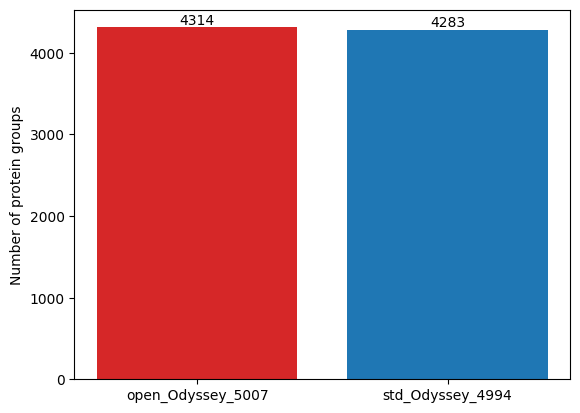

In [12]:
fig, ax = plt.subplots()

species = ("open_Odyssey_5007","std_Odyssey_4994")
counts = [len(table1.drop_duplicates(subset='ProteinID', keep="first")), 
          len(table2.drop_duplicates(subset='ProteinID', keep="first"))]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

#ax.bar(species, counts, label=bar_labels, color=bar_colors)
ax.bar(species, counts, color=bar_colors)

ax.set_ylabel('Number of protein groups')
ax.bar_label(ax.containers[0], label_type='edge')
#ax.set_title('')
#ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 5400)
#plt.savefig('protein.png', format="png",bbox_inches='tight')
plt.show()

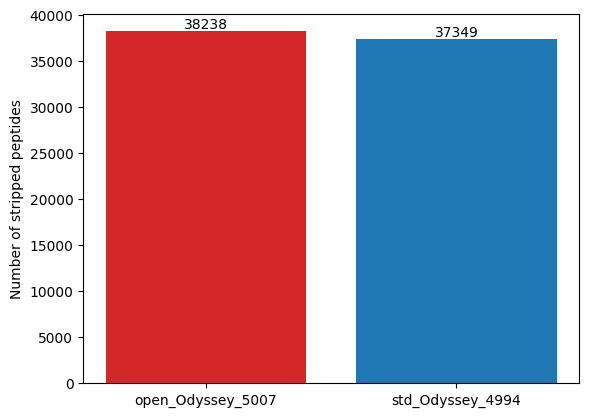

In [13]:
fig, ax = plt.subplots()

species = ("open_Odyssey_5007","std_Odyssey_4994")
counts = [len(table1.drop_duplicates(subset='stripped_peptides', keep="first")), 
          len(table2.drop_duplicates(subset='stripped_peptides', keep="first"))]
bar_labels = ['red', 'blue', 'green', 'm']
bar_colors = ['tab:red', 'tab:blue', 'tab:green','m']

#ax.bar(species, counts, label=bar_labels, color=bar_colors)
ax.bar(species, counts, color=bar_colors)

ax.set_ylabel('Number of stripped peptides')
ax.bar_label(ax.containers[0], label_type='edge')
#ax.set_title('HeLa proteins in MIDIA')
#ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 5400)
#plt.savefig('pep.png', format="png",bbox_inches='tight')

plt.show()

In [15]:
#prepare the venn diagram
#get the peptide sequences (no duplicates) for all compared tools:
PEP_table1 = pd.DataFrame(table1["stripped_peptides"],columns=['stripped_peptides']).drop_duplicates(subset='stripped_peptides', keep="first")
PEP_table2 = pd.DataFrame(table2["stripped_peptides"],columns=['stripped_peptides']).drop_duplicates(subset='stripped_peptides', keep="first")

PEP_table1["open_Odyssey_5007"]='True'
PEP_table2["std_Odyssey_4994"]='True'

#join the tables
PEP_table1.set_index('stripped_peptides',inplace=True)
PEP_table2.set_index('stripped_peptides',inplace=True)

final_PEP = pd.concat([PEP_table1,PEP_table2],axis=1,sort=False).reset_index()

#replace all NaN with False
final_PEP["open_Odyssey_5007"].fillna(False,inplace=True)
final_PEP["std_Odyssey_4994"].fillna(False,inplace=True)
#change the dtypes to boolean
for c in ["open_Odyssey_5007","std_Odyssey_4994"]:
    final_PEP[c] = final_PEP[c].astype(bool)
final_PEP.dtypes

stripped_peptides    object
open_Odyssey_5007      bool
std_Odyssey_4994       bool
dtype: object

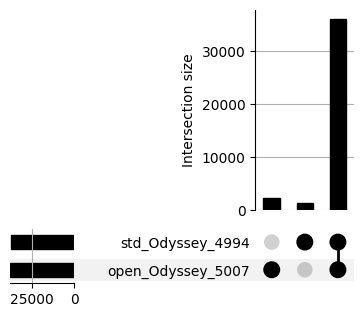

In [16]:
#plot venn diagram
PEP_upsetplot = final_PEP.groupby(["open_Odyssey_5007","std_Odyssey_4994"]).stripped_peptides.size()

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    upsetplot.plot(PEP_upsetplot)

#plt.savefig('vennd.png', format="png",bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

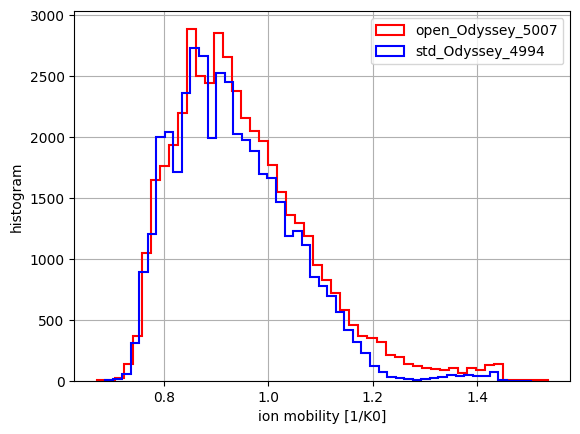

In [20]:
plt.xlabel('ion mobility [1/K0]')
plt.ylabel('histogram')
#plt.ylim([-6,4])
#plt.xlim([7,27])
#plt.xscale('log', basex=2)
plt.hist(table1["ion_mobility"],bins=50,histtype='step',linewidth=1.5,color='r',label='open_Odyssey_5007')
plt.hist(table2["ion_mobility"],bins=50,histtype='step',linewidth=1.5,color='b',label='std_Odyssey_4994')
plt.grid()
#plt.figure().set_figwidth(15)
#plt.savefig('IM.png', format="png",bbox_inches='tight')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

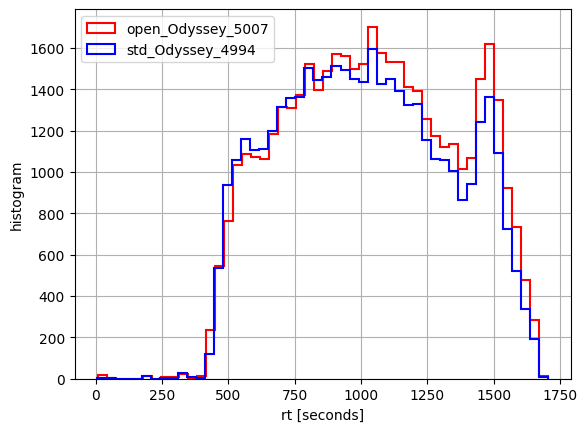

In [22]:
plt.xlabel('rt [seconds]')
plt.ylabel('histogram')
plt.hist(table1["rt"]*60,bins=50,histtype='step',linewidth=1.5,color='r',label='open_Odyssey_5007')
plt.hist(table2["rt"]*60,bins=50,histtype='step',linewidth=1.5,color='b',label='std_Odyssey_4994')
plt.grid()

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

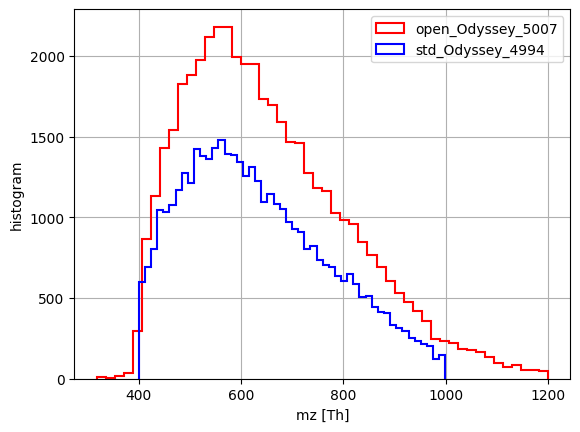

In [41]:
plt.xlabel('mz [Th]')
plt.ylabel('histogram')
plt.hist(table1["mz"],bins=50,histtype='step',linewidth=1.5,color='r',label='open_Odyssey_5007')
plt.hist(table2["mz"],bins=50,histtype='step',linewidth=1.5,color='b',label='std_Odyssey_4994')
plt.grid()

plt.legend()
plt.show

In [37]:
#get commonly found stripped peptides from the two tables:
PepInCommon = table1.merge(table2, left_on='stripped_peptides', right_on='stripped_peptides')
#get different stripped peptides in the two tables:
DiffInTable1 = table1.merge(table2, left_on='stripped_peptides', right_on='stripped_peptides',indicator = True, how='left').loc[lambda x : x['_merge']!='both']
DiffInTable2 = table2.merge(table1, left_on='stripped_peptides', right_on='stripped_peptides',indicator = True, how='left').loc[lambda x : x['_merge']!='both']
#drop unnecessary columns:
DiffInTable1 = DiffInTable1.drop(list(DiffInTable1.filter(regex='_y')),axis=1)
DiffInTable2 = DiffInTable2.drop(list(DiffInTable2.filter(regex='_y')),axis=1)
DiffInTable1

,run_x,ProteinID_x,species_x,stripped_peptides,modified_peptides_x,charge_x,mz_x,ms1_intensity_x,rt_x,ion_mobility_x,_merge
11,5007,A0A0B4J2D5,HUMAN,ITDLANLSAANHDAAIFPGGFGAAK,_ITDLANLSAANHDAAIFPGGFGAAK_,3,814.751892,152.306122,22.438290,1.005026,left_only
18,5007,A0A0B4J2D5,HUMAN,VLELTGK,_VLELTGK_,1,759.461060,248.014023,12.566882,1.332326,left_only
49,5007,A0AVT1,HUMAN,NLPIMSTASVEIDDALYSR,_NLPIMSTASVEIDDALYSR_,3,699.017395,29.269804,25.090103,0.980952,left_only
75,5007,A0MZ66,HUMAN,ELEEQLENETLHK,_ELEEQLENETLHK_,3,537.933533,30.545416,14.991547,0.834573,left_only
92,5007,A2RRP1,HUMAN,IVDHLLASLQQGR,_IVDHLLASLQQGR_,2,725.412231,19.932238,17.847626,1.047959,left_only
...,...,...,...,...,...,...,...,...,...,...,...
57251,5007,Q9Y6M5,HUMAN,AENIPAVVIEIK,_AENIPAVVIEIK_,2,648.382080,10.898866,21.612795,0.961122,left_only
57259,5007,Q9Y6R4,HUMAN,NLLEEEWNFTK,_NLLEEEWNFTK_,2,711.848633,42.935455,22.797810,0.996390,left_only
57260,5007,Q9Y6R4,HUMAN,TVENVEEYSYK,_TVENVEEYSYK_,2,680.817017,51.885525,13.170883,0.954008,left_only
57268,5007,Q9Y6W3,HUMAN,DAYSLANNPQYK,_DAYSLANNPQYK_,2,692.330627,82.496788,14.004975,0.968918,left_only


<function matplotlib.pyplot.show(close=None, block=None)>

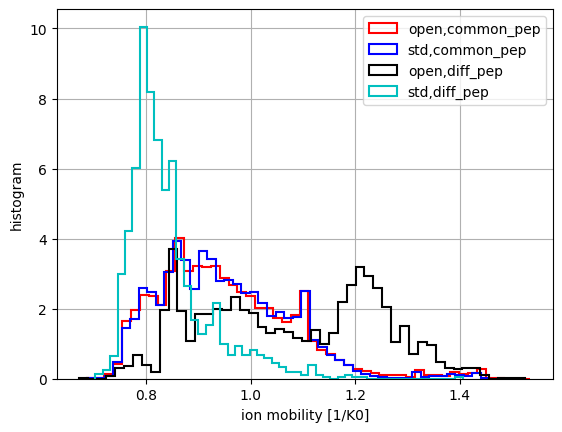

In [40]:
plt.xlabel('ion mobility [1/K0]')
plt.ylabel('histogram')

plt.hist(PepInCommon["ion_mobility_x"], bins=50,histtype='step',density=True,linewidth=1.5,color='r',label='open,common_pep')
plt.hist(PepInCommon["ion_mobility_y"], bins=50,histtype='step',density=True,linewidth=1.5,color='b',label='std,common_pep')
plt.hist(DiffInTable1["ion_mobility_x"],bins=50,histtype='step',density=True,linewidth=1.5,color='k',label='open,diff_pep')
plt.hist(DiffInTable2["ion_mobility_x"],bins=50,histtype='step',density=True,linewidth=1.5,color='c',label='std,diff_pep')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

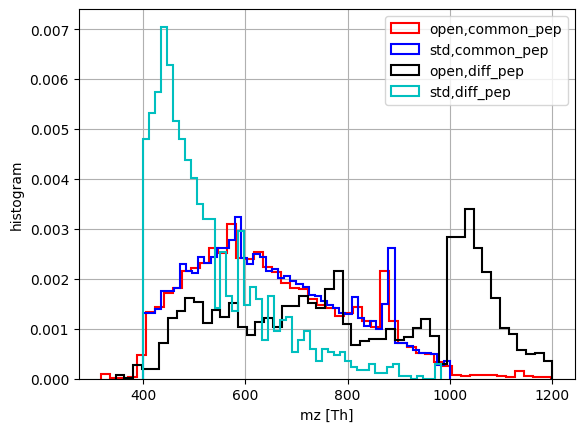

In [42]:
plt.xlabel('mz [Th]')
plt.ylabel('histogram')

plt.hist(PepInCommon["mz_x"], bins=50,histtype='step',density=True,linewidth=1.5,color='r',label='open,common_pep')
plt.hist(PepInCommon["mz_y"], bins=50,histtype='step',density=True,linewidth=1.5,color='b',label='std,common_pep')
plt.hist(DiffInTable1["mz_x"],bins=50,histtype='step',density=True,linewidth=1.5,color='k',label='open,diff_pep')
plt.hist(DiffInTable2["mz_x"],bins=50,histtype='step',density=True,linewidth=1.5,color='c',label='std,diff_pep')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

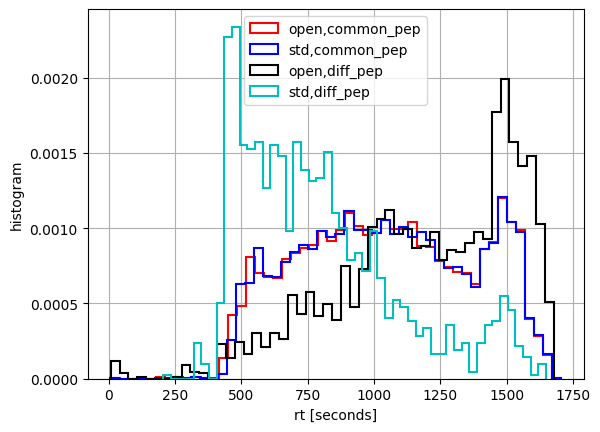

In [43]:
plt.xlabel('rt [seconds]')
plt.ylabel('histogram')

plt.hist(PepInCommon["rt_x"]*60, bins=50,histtype='step',density=True,linewidth=1.5,color='r',label='open,common_pep')
plt.hist(PepInCommon["rt_y"]*60, bins=50,histtype='step',density=True,linewidth=1.5,color='b',label='std,common_pep')
plt.hist(DiffInTable1["rt_x"]*60,bins=50,histtype='step',density=True,linewidth=1.5,color='k',label='open,diff_pep')
plt.hist(DiffInTable2["rt_x"]*60,bins=50,histtype='step',density=True,linewidth=1.5,color='c',label='std,diff_pep')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

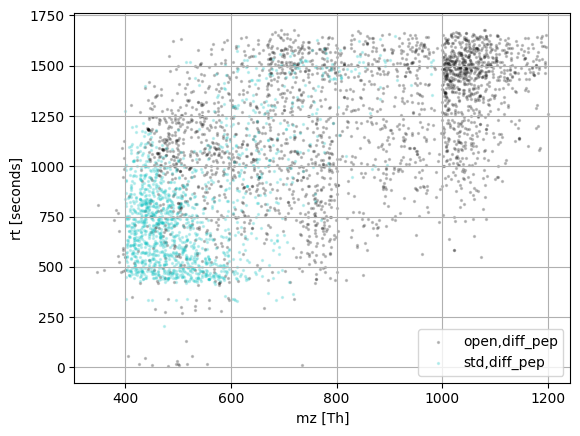

In [45]:
plt.xlabel('mz [Th]')
plt.ylabel('rt [seconds]')

plt.scatter(DiffInTable1["mz_x"],DiffInTable1["rt_x"]*60,color='k',marker="o",s=2,alpha=.2,label='open,diff_pep')
plt.scatter(DiffInTable2["mz_x"],DiffInTable2["rt_x"]*60,color='c',marker="o",s=2,alpha=.2,label='std,diff_pep')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

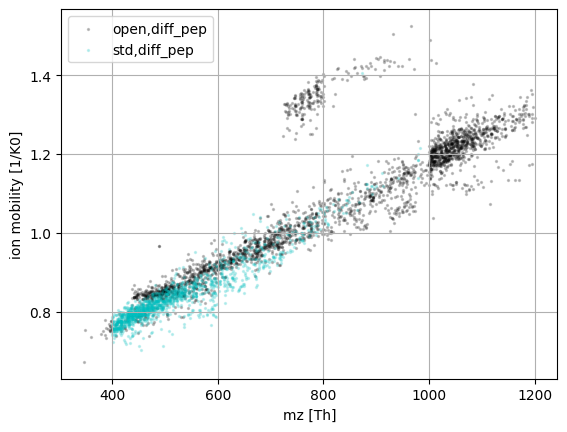

In [47]:
plt.xlabel('mz [Th]')
plt.ylabel('ion mobility [1/K0]')

plt.scatter(DiffInTable1["mz_x"],DiffInTable1["ion_mobility_x"],color='k',marker="o",s=2,alpha=.2,label='open,diff_pep')
plt.scatter(DiffInTable2["mz_x"],DiffInTable2["ion_mobility_x"],color='c',marker="o",s=2,alpha=.2,label='std,diff_pep')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

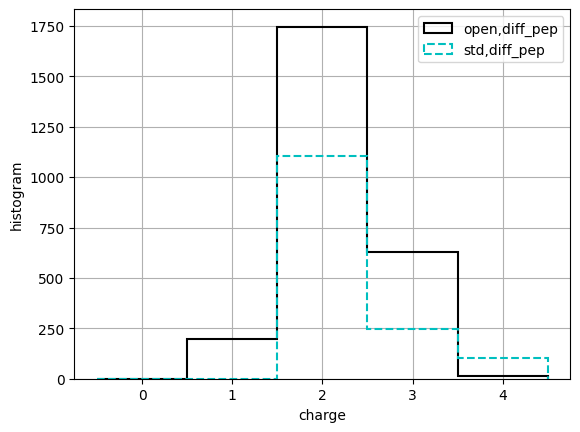

In [50]:
plt.xlabel('charge')
plt.ylabel('histogram')

x=DiffInTable1["charge_x"]
y=DiffInTable2["charge_x"]
plt.hist(x,bins=np.arange(0,x.max()+1.5)-0.5,histtype='step',linewidth=1.5,color='k',label='open,diff_pep')
plt.hist(y,bins=np.arange(0,y.max()+1.5)-0.5,histtype='step',linewidth=1.5,color='c',label='std,diff_pep',linestyle='dashed')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

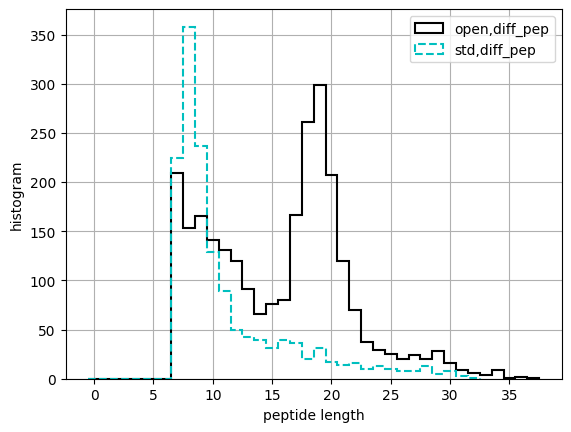

In [56]:
plt.xlabel('peptide length')
plt.ylabel('histogram')

x=DiffInTable1["stripped_peptides"].str.len()
y=DiffInTable2["stripped_peptides"].str.len()
plt.hist(x,bins=np.arange(0,x.max()+1.5)-0.5,histtype='step',linewidth=1.5,color='k',label='open,diff_pep')
plt.hist(y,bins=np.arange(0,y.max()+1.5)-0.5,histtype='step',linewidth=1.5,color='c',label='std,diff_pep',linestyle='dashed')

plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

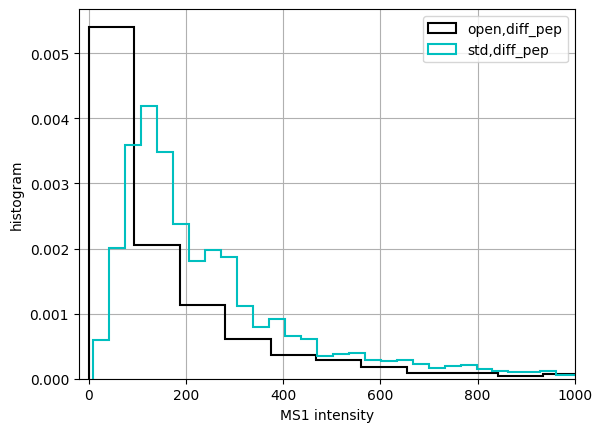

In [63]:
plt.xlabel('MS1 intensity')
plt.ylabel('histogram')

plt.xlim([-20,1000])
x=DiffInTable1["ms1_intensity_x"]
y=DiffInTable2["ms1_intensity_x"]
#plt.hist(x,bins=np.arange(0,x.max()+1.5)-0.5,histtype='step',linewidth=1.5,color='k',label='open,diff_pep')
#plt.hist(y,bins=np.arange(0,y.max()+1.5)-0.5,histtype='step',linewidth=1.5,color='c',label='std,diff_pep',linestyle='dashed')
plt.hist(x,bins=200,histtype='step',density=True,linewidth=1.5,color='k',label='open,diff_pep')
plt.hist(y,bins=200,histtype='step',density=True,linewidth=1.5,color='c',label='std,diff_pep')

plt.grid()
plt.legend()
plt.show